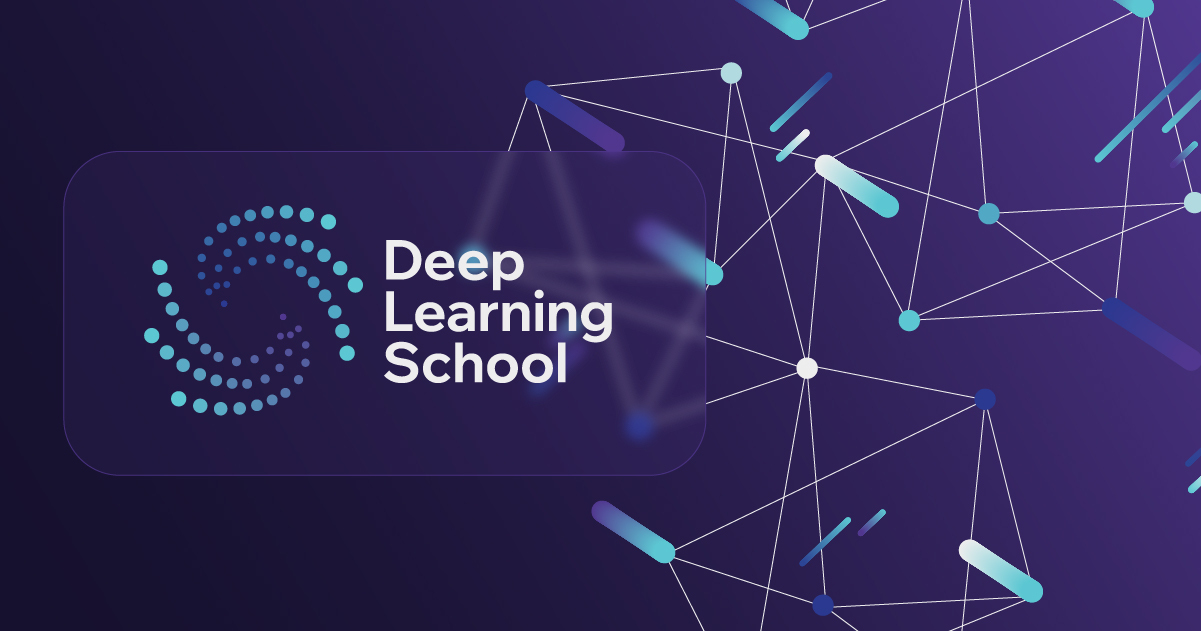

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

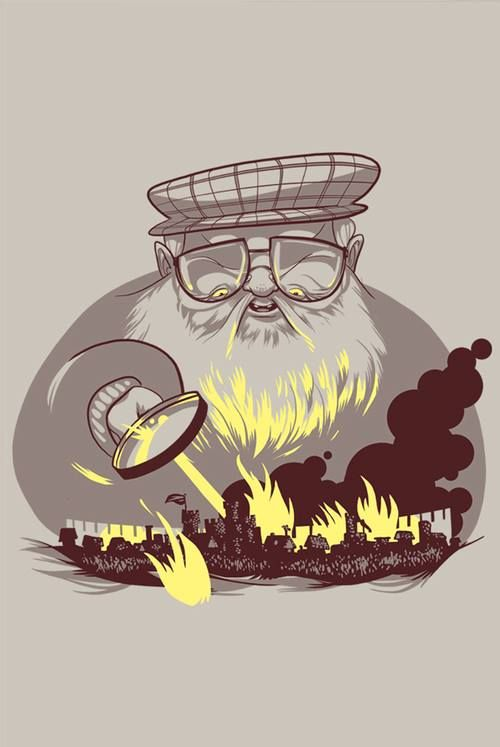

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [3]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 46.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 103MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [5]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [6]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [7]:
data['title'] = data['title'].fillna(data['title'].mode()[0])

In [8]:
data.drop(['culture', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age'], axis=1, inplace=True)
data

,name,title,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,NaN,0,0,0,0,0,0,0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,House Frey,1,1,1,1,1,1,1,1,0.896321,1
3,Addison Hill,Ser,1,House Swyft,0,0,0,1,0,0,1,0,0.267559,1
4,Aemma Arryn,Queen,0,House Arryn,0,0,0,0,0,1,1,0,0.183946,0
5,Sylva Santagar,Greenstone,0,House Santagar,0,0,0,1,0,1,1,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,1,0,1,1,0,0,1,0,0.160535,1
1554,Masha Heddle,Ser,0,NaN,1,1,0,0,0,0,0,0,0.040134,0
1555,Matthos Seaworth,Ser,1,House Seaworth,0,1,1,1,1,0,0,0,0.076923,0


In [9]:
data['house'] = data['house'].fillna(data['name'].apply(lambda x: x.split()[-1]))
data['house'] = data['house'].str.replace('House ', '')
data['house'].value_counts()

,count
house,
Frey,91
Night's Watch,88
Stark,60
Targaryen,54
Lannister,37
...,...
Khal,1
Cleon,1
Suggs,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [10]:
data['isPopular'] = data['popularity'].apply(lambda x: 0 if x < 0.5 else 1)
data['numDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data

,name,title,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular
S.No,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Targaryen,0,0,0,0,0,0,0,1,0.605351,0,1
2,Walder Frey,Lord of the Crossing,1,Frey,1,1,1,1,1,1,1,1,0.896321,1,1
3,Addison Hill,Ser,1,Swyft,0,0,0,1,0,0,1,0,0.267559,1,0
4,Aemma Arryn,Queen,0,Arryn,0,0,0,0,0,1,1,0,0.183946,0,0
5,Sylva Santagar,Greenstone,0,Santagar,0,0,0,1,0,1,1,0,0.043478,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Marwyn,1,0,1,1,0,0,1,0,0.160535,1,0
1554,Masha Heddle,Ser,0,Heddle,1,1,0,0,0,0,0,0,0.040134,0,0
1555,Matthos Seaworth,Ser,1,Seaworth,0,1,1,1,1,0,0,0,0.076923,0,0


In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [11]:
data.drop(columns=['name', 'popularity'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

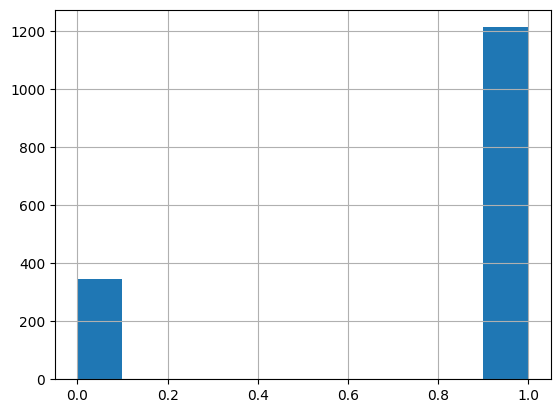

In [12]:
data['isAlive'].hist()
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

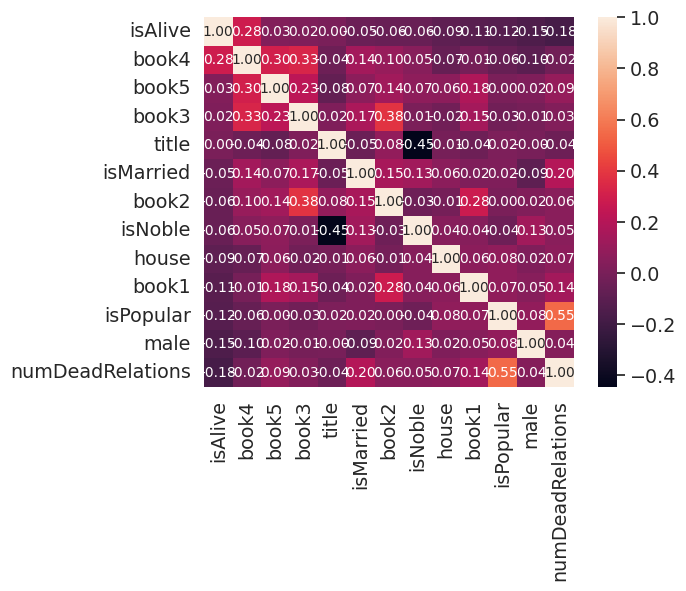

In [13]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


unprocessed_cat_features = data.select_dtypes(include='object').columns.tolist()
label_encoding = LabelEncoder()

for column in unprocessed_cat_features:
  data[column] = label_encoding.fit_transform(data[column])

corrmat = data.corr()
k = 15 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

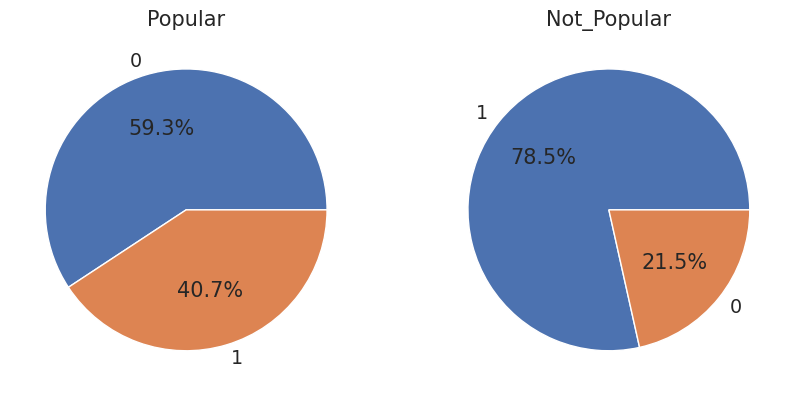

In [14]:
pop = data['isAlive'].loc[data['isPopular'] == 1].value_counts()
not_pop = data['isAlive'].loc[data['isPopular'] == 0].value_counts()


# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(pop.values, labels=pop.index, autopct='%1.1f%%')
ax2.pie(not_pop.values, labels=not_pop.index, autopct='%1.1f%%')

ax1.set_title("Popular")
ax2.set_title("Not_Popular")
plt.show()

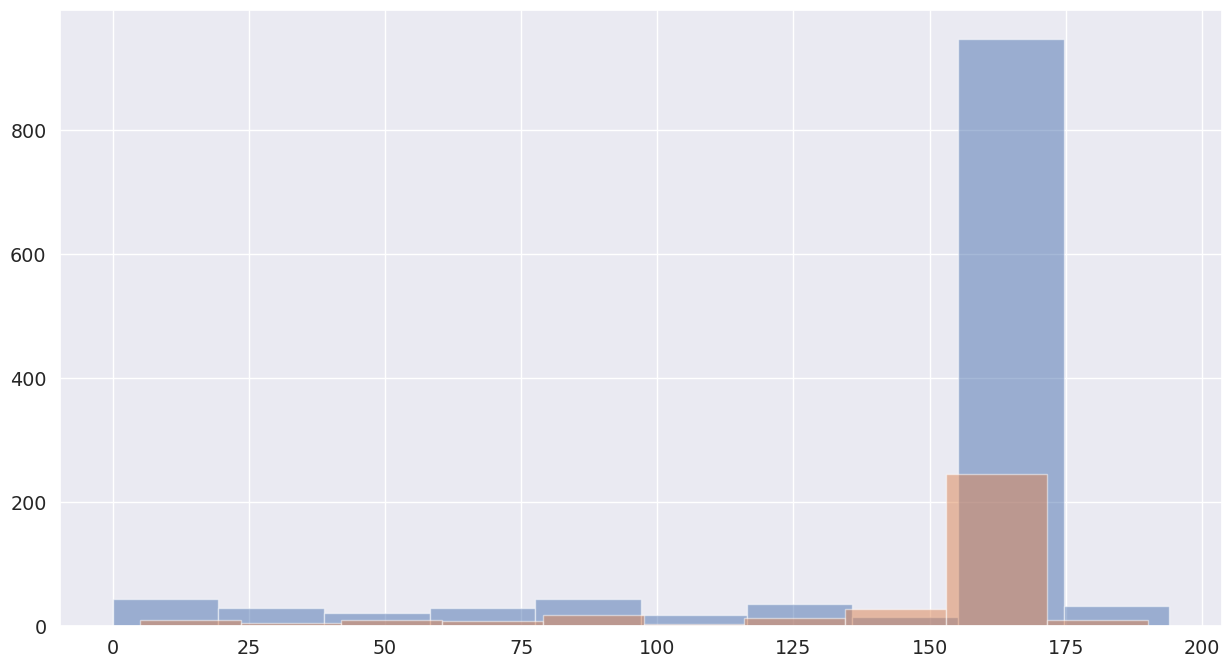

In [16]:
plt.figure(figsize=(15, 8))
plt.hist(data['title'].loc[data['isAlive'] == 1], alpha=0.5, label='выжил')
plt.hist(data['title'].loc[data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [17]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']

,title,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,isPopular
S.No,,,,,,,,,,,,
1,163,1,551,0,0,0,0,0,0,0,1,1
2,115,1,209,1,1,1,1,1,1,1,1,1
3,163,1,545,0,0,0,1,0,0,1,0,0
4,145,0,34,0,0,0,0,0,1,1,0,0
5,53,0,504,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,372,1,0,1,1,0,0,1,0,0
1554,163,0,271,1,1,0,0,0,0,0,0,0
1555,163,1,509,0,1,1,1,1,0,0,0,0


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345, test_size=0.25)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [20]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [65]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

**2.1.1** Масштабируем даные

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [37]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [68]:
# Шаг 1. создание модели
tree_decision = DecisionTreeClassifier()
# опишем сетку, по которой будем искать
param_grid = {
    'max_depth': np.arange(1, 5), # также можно указать обычный массив, [1, 2, 3, 4]
    'min_samples_leaf': [1,2, 3],
}

# создадим объект GridSearchCV
gridsearch = GridSearchCV(tree_decision, param_grid, refit=True, scoring=make_scorer(r2_score))
# Шаг 2. обучение модели
gridsearch.fit(X_train_scaled, y_train)

best_model = gridsearch.best_estimator_

In [33]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
ada_boost_pred = ada_boost.predict(X_test_scaled)

In [53]:
# Шаг 1. создание модели
random_forest = RandomForestClassifier()

# Шаг 2. обучение модели
random_forest.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
random_forest_pred = random_forest.predict(X_test_scaled)

In [54]:
# Шаг 1. создание модели
kn_eighbors = KNeighborsClassifier()

# Шаг 2. обучение модели
kn_eighbors.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
kn_eighbors_pred = kn_eighbors.predict(X_test_scaled)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [49]:
# Шаг 3. Предсказание на тестовых данных
logistic_regression_pred_test = logistic_regression.predict(X_test_scaled)
logistic_regression_pred_train = logistic_regression.predict(X_train_scaled)


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_test = accuracy_score(y_test, logistic_regression_pred_test)
accuracy_train = accuracy_score(y_train, logistic_regression_pred_train)

print("Accuracy : %.4f" % accuracy_test)
print("Accuracy : %.4f" % accuracy_train)

Accuracy : 0.7821
Accuracy : 0.7995


In [69]:
tree_decision_pred_test = best_model.predict(X_test_scaled)
tree_decision_pred_tarin = best_model.predict(X_train_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_test = accuracy_score(y_test, tree_decision_pred_test)
accuracy_train = accuracy_score(y_train, tree_decision_pred_tarin)

print("Accuracy : %.4f" % accuracy_test)
print("Accuracy : %.4f" % accuracy_train)

Accuracy : 0.7718
Accuracy : 0.8021


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [51]:
ada_boost_pred_test = ada_boost.predict(X_test_scaled)
ada_boost_pred_train = ada_boost.predict(X_train_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_test = accuracy_score(y_test, ada_boost_pred_test)
accuracy_train = accuracy_score(y_train, ada_boost_pred_train)

print("Accuracy : %.4f" % accuracy_test)
print("Accuracy : %.4f" % accuracy_train)

Accuracy : 0.7846
Accuracy : 0.8003


In [55]:
random_forest_pred_test = random_forest.predict(X_test_scaled)
random_forest_pred_train = random_forest.predict(X_train_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_test = accuracy_score(y_test, random_forest_pred_test)
accuracy_train = accuracy_score(y_train, random_forest_pred_train)

print("Accuracy : %.4f" % accuracy_test)
print("Accuracy : %.4f" % accuracy_train)

Accuracy : 0.7487
Accuracy : 0.9666


In [56]:
kn_eighbors_pred_test = kn_eighbors.predict(X_test_scaled)
kn_eighbors_pred_train = kn_eighbors.predict(X_train_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_test = accuracy_score(y_test, kn_eighbors_pred_test)
accuracy_train = accuracy_score(y_train, kn_eighbors_pred_train)

print("Accuracy : %.4f" % accuracy_test)
print("Accuracy : %.4f" % accuracy_train)

Accuracy : 0.7538
Accuracy : 0.8526


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [62]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.3MB/s]


In [63]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [96]:
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

In [97]:
data_test.drop(['culture', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age'], axis=1, inplace=True)
data_test['title'] = data_test['title'].fillna(data_test['title'].mode()[0])
data_test['house'] = data_test['house'].fillna(data_test['name'].apply(lambda x: x.split()[-1]))
data_test['house'] = data_test['house'].str.replace('House ', '')
data_test['isPopular'] = data_test['popularity'].apply(lambda x: 0 if x < 0.5 else 1)
data_test['numDeadRelations'] = data_test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data_test.drop(columns=['name', 'popularity'], inplace = True)
data_test.shape


(389, 12)

In [101]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


unprocessed_cat_features = data_test.select_dtypes(include='object').columns.tolist()
label_encoding = LabelEncoder()

for column in unprocessed_cat_features:
  data_test[column] = label_encoding.fit_transform(data_test[column])

In [102]:
data_test

,title,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,isPopular
S.No,,,,,,,,,,,,
1558,94,0,14,0,0,0,0,1,0,0,0,0
1559,94,0,114,0,1,1,1,1,0,0,0,1
1560,94,0,22,0,0,1,1,0,0,0,0,0
1561,94,1,152,1,1,1,1,1,0,1,0,0
1562,94,1,54,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1942,94,1,132,1,1,1,1,1,0,0,0,0
1943,94,1,15,0,1,0,1,1,0,0,0,0
1944,94,1,131,1,1,1,1,1,0,0,0,0


In [103]:
predict = ada_boost.predict(data_test)
submission['isAlive'] = predict

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


In [107]:
submission['isAlive'].value_counts()

,count
isAlive,
1,389


Как сохранить измененный Pandas DataFrame в csv файл:

In [104]:
submission.to_csv("/content/new_submission.csv", index=False)